<a href="https://colab.research.google.com/github/37khalil/SVM-Implementation/blob/main/Car_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# import itertools

# plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

%matplotlib inline

Comansant par un cas parfait pour le demantration de la separation lineaire

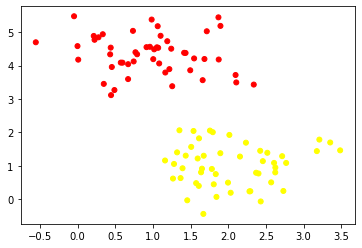

In [63]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn')

In [59]:
def plot_svc_decision_function(model, X, y, ax=None, plot_support=True):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn')
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=125, linewidth=1, c='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def train_linear_SVM(X, y):
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    plot_svc_decision_function(model, X, y)
    return model

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]]


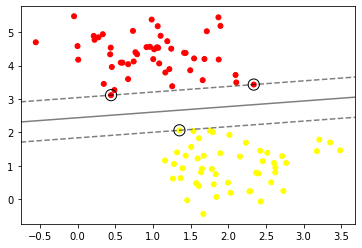

In [60]:
linear_model = train_linear_SVM(X, y)
print(linear_model.support_vectors_)

[[1.35139348 2.2       ]
 [1.35139348 2.06383637]]


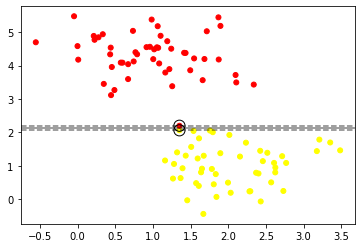

In [64]:
X = np.append(X, [[1.35139348, 2.2]], axis=0)
y = np.append(y, 0)

linear_model = train_linear_SVM(X, y)
print(linear_model.support_vectors_)

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 200, 1000), value=10), Output()), _dom_c…

In [ ]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);